<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment1/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change the path to where you have saved the input files.
pathXtrain="/content/drive/MyDrive/machineLearning/Assignment1/x_train.npy"
pathYtrain="/content/drive/MyDrive/machineLearning/Assignment1/y_train.npy"
pathXtest="/content/drive/MyDrive/machineLearning/Assignment1/x_test.npy"
pathYtest="/content/drive/MyDrive/machineLearning/Assignment1/y_test.npy"

# load data
xtrain = np.load(pathXtrain)
ytrain = np.load(pathYtrain)
xtest = np.load(pathXtest)
ytest = np.load(pathYtest)

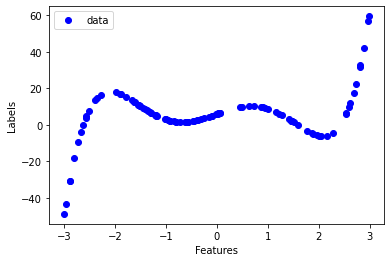

In [4]:
# plot the relationship between the feature and label
plt.figure(1)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

In [61]:
# Define the linear regression model as a class
class linearRegression():
    # constructor function for initializing some variables
    def __init__(self, X, Y, degree, Nsin, learning_rate, epochs):
        self.Ndeg = degree          # degree of polynomial bases
        self.Nsin = Nsin            # frequency of Sine bases - sin(1*x), sin(2*x), sin(3*x), ...
        self.lr = learning_rate
        self.epochs = epochs

        self.X = X
        self.Y = Y
        self.m, self.n = X.shape

        bases = self.basisFunc(self.X, self.m)
        self.mean = np.mean(bases[:, 1:], axis=0)   # mean of bases for standardizing data
        self.std = np.std(bases[:, 1:], axis=0)     # standard deviation of bases for standardizing data

    def basisFunc(self, X, m):
        
        # adding bias to bases
        bases = np.ones((m, 1))
        
        # adding polynomials to bases
        for i in range(1, self.Ndeg+1):
            x_pow = np.power(X, i)
            bases = np.append(bases, x_pow.reshape(-1, 1), axis=1)

        # adding sine to bases
        for i in range(1, self.Nsin+1):
            bases = np.append(bases, np.sin(i*X).reshape(-1, 1), axis=1)
        
        return bases
	
    # standardizing data by subtracting mean and dividing it with standard deviation of the training set
    def standardize(self, X):
        X[:, 1:] = (X[:, 1:] - self.mean) / self.std
        return X

    # inner product of bases and weights
    def h(self, x, theta):
        return np.matmul(x, theta)

    def cost_function(self, x, y, W):
        return ((self.h(x, W)-y).T@(self.h(x, W)-y))/(2*len(y))

    # training process - finding weights and baises with gradient descent optimization
    def fit(self):
        
        m = self.m
        self.W = np.zeros(self.Ndeg+self.Nsin+1)

        # h(x) = w0 + w11 * x^1 + w12 * x^2 + ... + w1n * x^n + w21 * sin(x) + w22 * sin(2*x) + ... + w2m * sin(m*x)
        bases = self.basisFunc(self.X, m)
        basesNorm = self.standardize(bases)

        self.J_all = []

        # gradient descent algorithm
        for _ in range(self.epochs):
            h = self.h(bases, self.W)
            error = h - self.Y

            self.W = self.W - self.lr * (1 / m) * np.dot(basesNorm.T, error)
            self.J_all.append(self.cost_function(bases, self.Y, self.W))

        return self
	
    # prediction of output using obtained weights and baises after training
    def predict(self, X):
	
        m = X.shape[0]
        bases = self.basisFunc(X, m)
        basesNorm = self.standardize(bases)

        return self.h(basesNorm, self.W)
        #return self.h(bases, self.W)

    # plot cost function over epochs
    def plot_cost(self):
        plt.figure(3)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.plot(range(self.epochs), self.J_all, 'b', linewidth = "3")
        plt.savefig('loss.png')

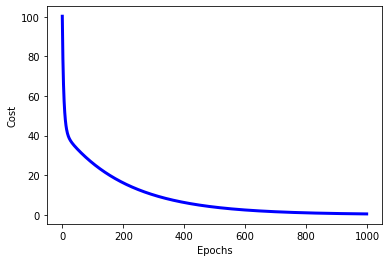

In [76]:
# make an object of the linear regression model
model = linearRegression(xtrain, ytrain, degree=2, Nsin=5, learning_rate=0.1, epochs=1000)

# train the model
model.fit()

# plot the cost values over epochs
model.plot_cost()

In [77]:
# print weights of the model
print("Weights are: ", model.W)

Weights are:  [ 5.60573724e+00  3.95247086e+01 -3.41691129e-02 -3.41067640e+01
  1.64501480e+01 -4.83941443e+00  1.33678302e+00 -1.98889268e-01]


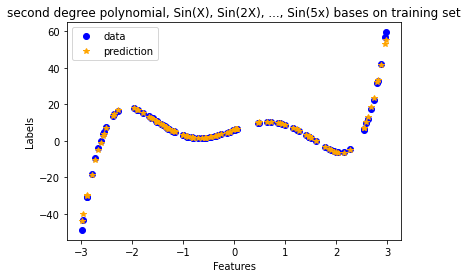

In [80]:
# predict values of the labels using the trained model on the training set
YpredTrain = model.predict(xtrain)

# plots prediction on training set
plt.figure(2)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, YpredTrain, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('second degree polynomial, Sin(X), Sin(2X), ..., Sin(5x) bases on training set')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

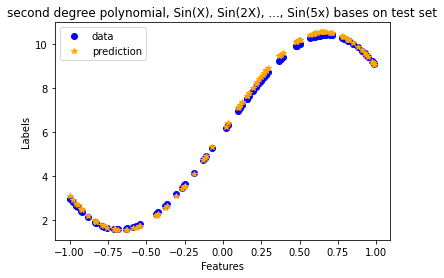

In [79]:
# predict values of the labels using the trained model on the test set
YpredTest = model.predict(xtest)

# plots prediction on test set
plt.figure(3)
plt.plot(xtest, ytest, 'o', color = 'blue', label="data")
plt.plot(xtest, YpredTest, '*', color = 'orange', label="prediction")
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('second degree polynomial, Sin(X), Sin(2X), ..., Sin(5x) bases on test set')
plt.legend(loc="upper left")
plt.savefig('testset.png')

In the next parts, I am showing results for individual basis function that I have used to train my model. I have used third degree polynomial with 6 different sine functions (different frequency).

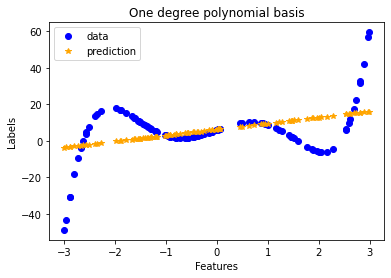

In [10]:
# train a new model
model1 = linearRegression(xtrain, ytrain, degree=1, Nsin=0, learning_rate=0.1, epochs=1000)
model1.fit()

# predict values of the labels using the trained model on the training set
Yhat1 = model1.predict(xtrain)

# plots predictions
ind=4
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat1, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('One degree polynomial basis')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

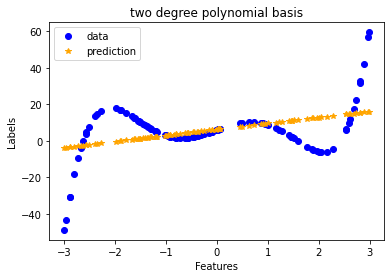

In [11]:
# train a new model
model2 = linearRegression(xtrain, ytrain, degree=2, Nsin=0, learning_rate=0.1, epochs=1000)
model2.fit()

# predict values of the labels using the trained model on the training set
Yhat2 = model2.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat2, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('two degree polynomial basis')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

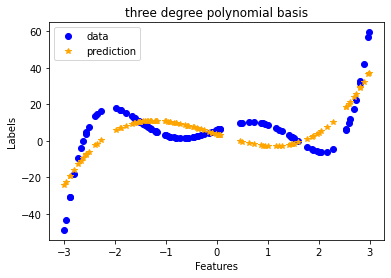

In [12]:
# train a new model
model3 = linearRegression(xtrain, ytrain, degree=3, Nsin=0, learning_rate=0.1, epochs=1000)
model3.fit()

# predict values of the labels using the trained model on the training set
Yhat3 = model3.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat3, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('three degree polynomial basis')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

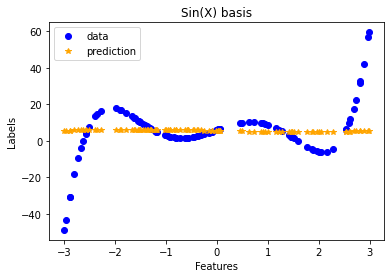

In [13]:
# train a new model
model4 = linearRegression(xtrain, ytrain, degree=0, Nsin=1, learning_rate=0.1, epochs=1000)
model4.fit()

# predict values of the labels using the trained model on the training set
Yhat4 = model4.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat4, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X) basis')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

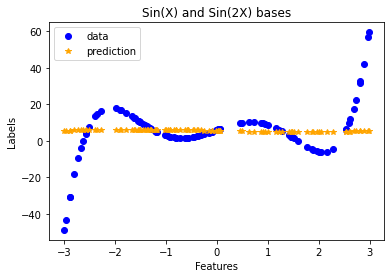

In [14]:
# train a new model
model5 = linearRegression(xtrain, ytrain, degree=0, Nsin=2, learning_rate=0.1, epochs=1000)
model5.fit()

# predict values of the labels using the trained model on the training set
Yhat5 = model5.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat4, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X) and Sin(2X) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

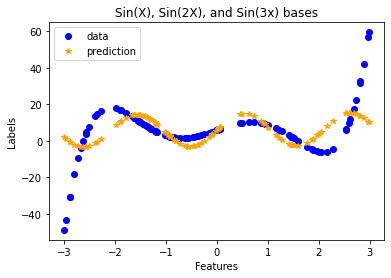

In [15]:
# train a new model
model6 = linearRegression(xtrain, ytrain, degree=0, Nsin=3, learning_rate=0.1, epochs=1000)
model6.fit()

# predict values of the labels using the trained model on the training set
Yhat6 = model6.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat6, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X), Sin(2X), and Sin(3x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

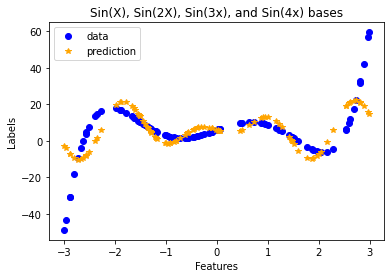

In [16]:
# train a new model
model7 = linearRegression(xtrain, ytrain, degree=0, Nsin=4, learning_rate=0.1, epochs=1000)
model7.fit()

# predict values of the labels using the trained model on the training set
Yhat7 = model7.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat7, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X), Sin(2X), Sin(3x), and Sin(4x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

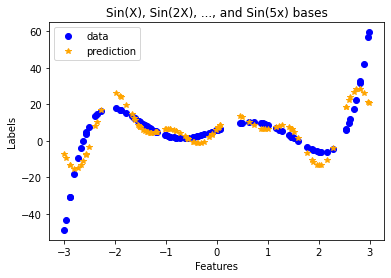

In [17]:
# train a new model
model8 = linearRegression(xtrain, ytrain, degree=0, Nsin=5, learning_rate=0.1, epochs=1000)
model8.fit()

# predict values of the labels using the trained model on the training set
Yhat8 = model8.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat8, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X), Sin(2X), ..., and Sin(5x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

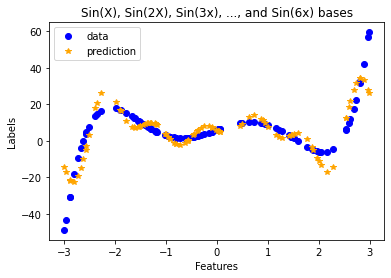

In [24]:
# train a new model
model9 = linearRegression(xtrain, ytrain, degree=0, Nsin=6, learning_rate=0.1, epochs=1000)
model9.fit()

# predict values of the labels using the trained model on the training set
Yhat9 = model9.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat9, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Sin(X), Sin(2X), Sin(3x), ..., and Sin(6x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

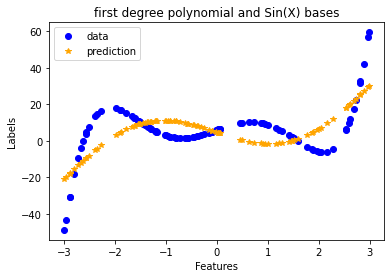

In [25]:
# train a new model
model10 = linearRegression(xtrain, ytrain, degree=1, Nsin=1, learning_rate=0.1, epochs=1000)
model10.fit()

# predict values of the labels using the trained model on the training set
Yhat10 = model10.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat10, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('first degree polynomial and Sin(X) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

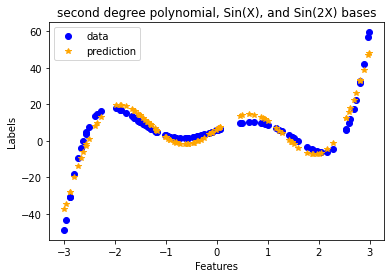

In [26]:
# train a new model
model11 = linearRegression(xtrain, ytrain, degree=2, Nsin=2, learning_rate=0.1, epochs=1000)
model11.fit()

# predict values of the labels using the trained model on the training set
Yhat11 = model11.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat11, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('second degree polynomial, Sin(X), and Sin(2X) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

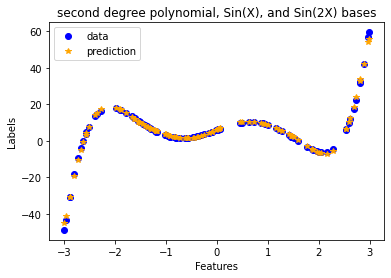

In [27]:
# train a new model
model12 = linearRegression(xtrain, ytrain, degree=2, Nsin=4, learning_rate=0.1, epochs=1000)
model12.fit()

# predict values of the labels using the trained model on the training set
Yhat12 = model12.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat12, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('second degree polynomial, Sin(X), and Sin(2X) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

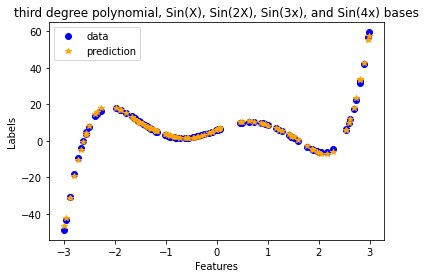

In [28]:
# train a new model
model13 = linearRegression(xtrain, ytrain, degree=3, Nsin=4, learning_rate=0.1, epochs=1000)
model13.fit()

# predict values of the labels using the trained model on the training set
Yhat13 = model13.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat13, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('third degree polynomial, Sin(X), Sin(2X), Sin(3x), and Sin(4x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

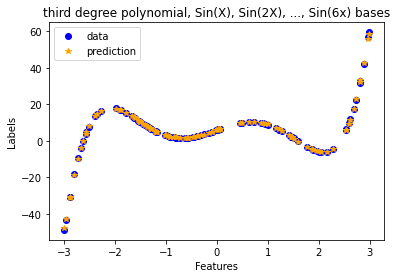

In [29]:
# train a new model
model14 = linearRegression(xtrain, ytrain, degree=3, Nsin=6, learning_rate=0.1, epochs=1000)
model14.fit()

# predict values of the labels using the trained model on the training set
Yhat14 = model14.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat14, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('third degree polynomial, Sin(X), Sin(2X), ..., Sin(6x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

We can also use different bases than Sin and polynomials.

In [30]:
# Define the linear regression model as a class with polynomical and Cos bases
class linearRegressionCos():
    # constructor function for initializing some variables
    def __init__(self, X, Y, degree, Ncos, learning_rate, epochs):
        self.Ndeg = degree          # degree of polynomial bases
        self.Ncos = Ncos            # frequency of Sine bases - sin(1*x), sin(2*x), sin(3*x), ...
        self.lr = learning_rate
        self.epochs = epochs

        self.X = X
        self.Y = Y
        self.m, self.n = X.shape

        bases = self.basisFunc(self.X, self.m)
        self.mean = np.mean(bases[:, 1:], axis=0)   # mean of bases for standardizing data
        self.std = np.std(bases[:, 1:], axis=0)     # standard deviation of bases for standardizing data

    def basisFunc(self, X, m):
        
        # adding bias to bases
        bases = np.ones((m, 1))
        
        # adding polynomials to bases
        for i in range(1, self.Ndeg+1):
            x_pow = np.power(X, i)
            bases = np.append(bases, x_pow.reshape(-1, 1), axis=1)

        # adding sine to bases
        for i in range(1, self.Ncos+1):
            bases = np.append(bases, np.cos(i*X).reshape(-1, 1), axis=1)
        
        return bases
	
    # standardizing data by subtracting mean and dividing it with standard deviation of the training set
    def standardize(self, X):
        X[:, 1:] = (X[:, 1:] - self.mean) / self.std
        return X

    # inner product of bases and weights
    def h(self, x, theta):
        return np.matmul(x, theta)

    def cost_function(self, x, y, W):
        return ((self.h(x, W)-y).T@(self.h(x, W)-y))/(2*len(y))

    # training process - finding weights and baises with gradient descent optimization
    def fit(self):
        
        m = self.m
        self.W = np.zeros(self.Ndeg+self.Ncos+1)

        # h(x) = w0 + w11 * x^1 + w12 * x^2 + ... + w1n * x^n + w21 * sin(x) + w22 * sin(2*x) + ... + w2m * sin(m*x)
        bases = self.basisFunc(self.X, m)
        basesNorm = self.standardize(bases)

        self.J_all = []

        # gradient descent algorithm
        for _ in range(self.epochs):
            h = self.h(bases, self.W)
            error = h - self.Y

            self.W = self.W - self.lr * (1 / m) * np.dot(basesNorm.T, error)
            self.J_all.append(self.cost_function(bases, self.Y, self.W))

        return self
	
    # prediction of output using obtained weights and baises after training
    def predict(self, X):
	
        m = X.shape[0]
        bases = self.basisFunc(X, m)
        basesNorm = self.standardize(bases)

        return self.h(basesNorm, self.W)
        #return self.h(bases, self.W)

    # plot cost function over epochs
    def plot_cost(self):
        plt.figure(3)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.plot(range(self.epochs), self.J_all, 'b', linewidth = "3")
        plt.savefig('loss.png')

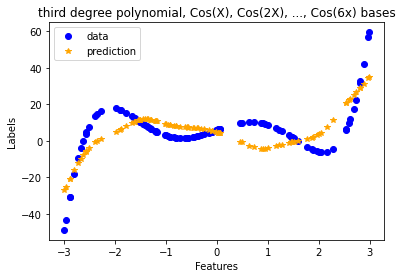

In [32]:
# train a new model with Cos and polynomial bases
model15 = linearRegressionCos(xtrain, ytrain, degree=3, Ncos=6, learning_rate=0.1, epochs=1000)
model15.fit()

# predict values of the labels using the trained model on the training set
Yhat15 = model15.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat15, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('third degree polynomial, Cos(X), Cos(2X), ..., Cos(6x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

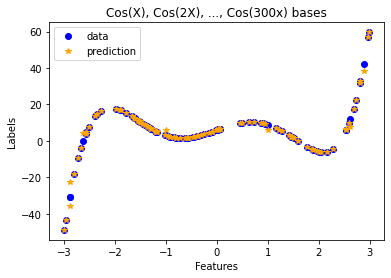

In [81]:
# train a new model with Cos and polynomial bases
model17 = linearRegressionCos(xtrain, ytrain, degree=0, Ncos=300, learning_rate=0.1, epochs=1000)
model17.fit()

# predict values of the labels using the trained model on the training set
Yhat17 = model17.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat17, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Cos(X), Cos(2X), ..., Cos(300x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

In [33]:
# Define the linear regression model as a class with polynomical and exp bases
class linearRegressionExp():
    # constructor function for initializing some variables
    def __init__(self, X, Y, degree, Nexp, learning_rate, epochs):
        self.Ndeg = degree          # degree of polynomial bases
        self.Nexp = Nexp            # frequency of Sine bases - sin(1*x), sin(2*x), sin(3*x), ...
        self.lr = learning_rate
        self.epochs = epochs

        self.X = X
        self.Y = Y
        self.m, self.n = X.shape

        bases = self.basisFunc(self.X, self.m)
        self.mean = np.mean(bases[:, 1:], axis=0)   # mean of bases for standardizing data
        self.std = np.std(bases[:, 1:], axis=0)     # standard deviation of bases for standardizing data

    def basisFunc(self, X, m):
        
        # adding bias to bases
        bases = np.ones((m, 1))
        
        # adding polynomials to bases
        for i in range(1, self.Ndeg+1):
            x_pow = np.power(X, i)
            bases = np.append(bases, x_pow.reshape(-1, 1), axis=1)

        # adding sine to bases
        for i in range(1, self.Nexp+1):
            bases = np.append(bases, np.cos(i*X).reshape(-1, 1), axis=1)
        
        return bases
	
    # standardizing data by subtracting mean and dividing it with standard deviation of the training set
    def standardize(self, X):
        X[:, 1:] = (X[:, 1:] - self.mean) / self.std
        return X

    # inner product of bases and weights
    def h(self, x, theta):
        return np.matmul(x, theta)

    def cost_function(self, x, y, W):
        return ((self.h(x, W)-y).T@(self.h(x, W)-y))/(2*len(y))

    # training process - finding weights and baises with gradient descent optimization
    def fit(self):
        
        m = self.m
        self.W = np.zeros(self.Ndeg+self.Nexp+1)

        # h(x) = w0 + w11 * x^1 + w12 * x^2 + ... + w1n * x^n + w21 * sin(x) + w22 * sin(2*x) + ... + w2m * sin(m*x)
        bases = self.basisFunc(self.X, m)
        basesNorm = self.standardize(bases)

        self.J_all = []

        # gradient descent algorithm
        for _ in range(self.epochs):
            h = self.h(bases, self.W)
            error = h - self.Y

            self.W = self.W - self.lr * (1 / m) * np.dot(basesNorm.T, error)
            self.J_all.append(self.cost_function(bases, self.Y, self.W))

        return self
	
    # prediction of output using obtained weights and baises after training
    def predict(self, X):
	
        m = X.shape[0]
        bases = self.basisFunc(X, m)
        basesNorm = self.standardize(bases)

        return self.h(basesNorm, self.W)
        #return self.h(bases, self.W)

    # plot cost function over epochs
    def plot_cost(self):
        plt.figure(3)
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.plot(range(self.epochs), self.J_all, 'b', linewidth = "3")
        plt.savefig('loss.png')

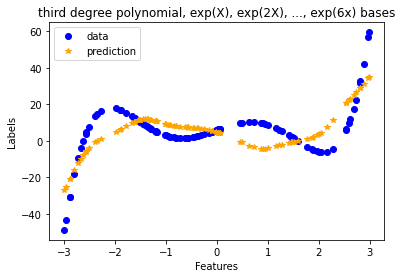

In [41]:
# train a new model with Cos and polynomial bases
model16 = linearRegressionExp(xtrain, ytrain, degree=3, Nexp=6, learning_rate=0.1, epochs=1000)
model16.fit()

# predict values of the labels using the trained model on the training set
Yhat16 = model16.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat16, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('third degree polynomial, exp(X), exp(2X), ..., exp(6x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')

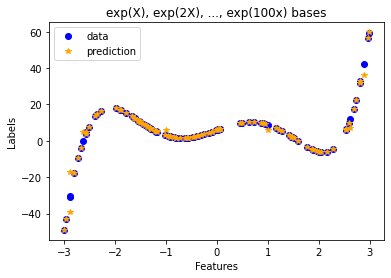

In [43]:
# train a new model with Cos and polynomial bases
model18 = linearRegressionExp(xtrain, ytrain, degree=0, Nexp=250, learning_rate=0.1, epochs=1000)
model18.fit()

# predict values of the labels using the trained model on the training set
Yhat18 = model18.predict(xtrain)

# plots predictions
ind += 1
plt.figure(ind)
plt.plot(xtrain, ytrain, 'o', color = 'blue', label="data")
plt.plot(xtrain, Yhat18, '*', color = 'orange', label="prediction")    
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('exp(X), exp(2X), ..., exp(250x) bases')
plt.legend(loc="upper left")
plt.savefig('traningset.png')